## Load annotation for histological compartments and quantify change

In [1]:
import os
import sys
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
#import hdf5plugin

# Add repo path to sys path (allows to access scripts and metadata from repo)
repo_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/Spatial_analyses'
sys.path.insert(1, repo_path) 
sys.path.insert(2, '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts')


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # to show output from all the lines in a cells
pd.set_option('display.max_column',None) # display all the columns in pandas
pd.options.display.max_rows = 100

In [2]:
# Formatting
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
font_manager.fontManager.addfont("/nfs/team205/ny1/ThymusSpatialAtlas/software/Arial.ttf")
#plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')


In [2]:
# Define plot and path dirs
plot_path = os.path.join(repo_path, 'plots')
data_path = os.path.join(repo_path, 'data')
model_path = os.path.join(repo_path, 'models')
# Define plot and path dirs
results_path = os.path.join(repo_path, 'results')
general_data_path = '/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/data'

In [4]:
# Import custom scripts
from utils import get_latest_version,update_obs,freq_by_donor
from anno_levels import get_ct_levels, get_ct_palette, age_group_levels, age_group_palette


plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

from plotting.utils import plot_grouped_boxplot, calc_figsize

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
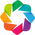

In [6]:
import os
import panel as pn
import socket
import tissue_tag as tt
os.environ["BOKEH_ALLOW_WS_ORIGIN"] = "*"

## Load Visium annotations

In [3]:
spatial_meta_thyage = pd.read_excel(f'{data_path}/ThyAge_spatial_metadata_v3_2025-09-03.xlsx')

In [6]:
visium_thyage = spatial_meta_thyage.loc[(spatial_meta_thyage['chemistry_simple']!='Xenium') & (spatial_meta_thyage['Study_name']=='Thymus_ageing'), 'SampleID'].unique().tolist()
visium_htsa = spatial_meta_thyage.loc[(spatial_meta_thyage['chemistry_simple']!='Xenium') & (spatial_meta_thyage['Study_name']=='HTSA'), 'SampleID'].unique().tolist()


In [7]:
anno_path = f'{data_path}/Visium_annotations'

In [57]:
def quant_anno_tt_v2(sample_path, samples, anno_name, anno_loc='keys'):
    annotations = pd.DataFrame(index=samples)

    for sample in samples:
        print(f'Processing sample: {sample}')
        # Load annotation
        anno, ppm_anno = tt.load_annotation(folder=f'{sample_path}/{sample}/', file_name=anno_name)
        
        # Get unique area codes in the label image (excluding 'unassigned')
        if anno_loc == 'keys':
            unique_areas = list(anno.annotation_map.keys())
        elif anno_loc == 'values':
            unique_areas = list(anno.annotation_map.values())
        else:
            raise ValueError("anno_loc must be either 'keys' or 'values'")
        # Calculate total pixels in the image
     #   total_pixels = anno.label_image.size

        for area_code, area_name in enumerate(unique_areas):
            # Calculate the count of pixels for each area
            area_pixels =  np.sum(anno.label_image==(area_code+1))
            
            # If the area doesn't exist in the columns, add it
            if area_name not in annotations.columns:
                annotations[area_name] = np.nan  # Create a column for new area

            # Store the percentage of the area in the DataFrame
            annotations.loc[sample, area_name] = area_pixels
            
    return annotations


In [65]:
#anno_thyage, ppm_anno = tt.load_annotation(folder=f'{anno_path}/{visium_thyage[0]}/',file_name='annotations_v1')
anno_thyage_df = quant_anno_tt_v2(sample_path=anno_path, samples=visium_thyage, anno_name='annotations_v2', anno_loc='keys')

Processing sample: THY81
loaded annotation image - annotations_v2 size - (2887, 4460)
loaded annotation map
OrderedDict({'unassigned': 'yellow', 'Artifacts': 'blue', 'Medulla': 'green', 'Cortex': 'cyan', 'Edge': 'brown', 'PVS': 'red', 'HC': 'magenta', 'fat': 'purple', 'fibrotic': 'orange'})
loaded ppm
{'ppm': 0.25}
Processing sample: THY96
loaded annotation image - annotations_v2 size - (2191, 3386)
loaded annotation map
OrderedDict({'unassigned': 'yellow', 'Artifacts': 'blue', 'Medulla': 'green', 'Cortex': 'cyan', 'Edge': 'brown', 'PVS': 'red', 'HC': 'magenta', 'fat': 'purple', 'fibrotic': 'orange'})
loaded ppm
{'ppm': 0.25}
Processing sample: THY57
loaded annotation image - annotations_v2 size - (2566, 3965)
loaded annotation map
OrderedDict({'unassigned': 'yellow', 'Artifacts': 'blue', 'Medulla': 'green', 'Cortex': 'cyan', 'Edge': 'brown', 'PVS': 'red', 'HC': 'magenta', 'fat': 'purple', 'fibrotic': 'orange'})
loaded ppm
{'ppm': 0.25}
Processing sample: THY112
loaded annotation image

In [66]:
anno_htsa_name = 'annotations_level_0'
anno_htsa, ppm_anno = tt.load_annotation(folder=f'{anno_path}/{visium_htsa[0]}/',file_name=anno_htsa_name)
anno_htsa_df1 = quant_anno_tt_v2(sample_path=anno_path, samples=visium_htsa, anno_name=anno_htsa_name, anno_loc='values')
anno_htsa_name = 'annotations_level_1'
anno_htsa, ppm_anno = tt.load_annotation(folder=f'{anno_path}/{visium_htsa[0]}/',file_name=anno_htsa_name)
anno_htsa_df2 = quant_anno_tt_v2(sample_path=anno_path, samples=visium_htsa, anno_name=anno_htsa_name, anno_loc='values')

loaded annotation image - annotations_level_0 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Processing sample: TA11486162
loaded annotation image - annotations_level_0 size - (4066, 4647)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Processing sample: TA11556493
loaded annotation image - annotations_level_0 size - (4121, 4644)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Processing sample: TA11556494
loaded annotation image - annotations_level_0 size - (4124, 4648)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: 'Edge', 5: 'Artifacts'}
loaded ppm
{'ppm': 0.5}
Processing sample: WSSS_THYst9142088
loaded annotation image - annotations_level_0 size - (4310, 4660)
loaded annotation map
{1: 'unassigned', 2: 'Cortex', 3: 'Medulla', 4: '

## Load Xenium annotations (based on CellCharter analysis)

In [68]:
anno_xenium_df = pd.read_csv(f'{data_path}/ThyAge_xenium_adata_paed+adult_CellCharter_obs_mcTEC_rich_cor.csv', index_col = 0)


In [70]:
anno_xenium_df_filt = anno_xenium_df.loc[anno_xenium_df['DonorID']!='A45']

anno_xenium_df_clean = pd.crosstab(index = anno_xenium_df_filt['SampleID'], columns = anno_xenium_df_filt['niche_cellcharter3_v2'])


## Combine different annotations

In [73]:
spatial_anno_df = pd.concat([anno_htsa_df1, anno_thyage_df, anno_xenium_df_clean], axis = 0)
spatial_anno_df.fillna(0, inplace=True) # fill NaN with 0
spatial_anno_df['Cortex_full'] = spatial_anno_df['Cortex']+spatial_anno_df['Edge']
spatial_anno_df['Medulla_full'] = spatial_anno_df['Medulla']+spatial_anno_df['HCs']+spatial_anno_df['HC']
spatial_anno_df['Non-functional'] = spatial_anno_df['PVS'] + spatial_anno_df['Adipose'] + spatial_anno_df['Vessels'] + spatial_anno_df['Fibrosis'] + spatial_anno_df['fat'] + spatial_anno_df['fibrotic']


In [74]:
spatial_anno_df['Total1'] = spatial_anno_df[['Cortex_full', 'Medulla_full', 'Non-functional']].sum(axis=1)
spatial_anno_df['Total2'] = spatial_anno_df[['Cortex_full', 'Medulla_full']].sum(axis=1)
spatial_anno_df.drop(columns = ['unassigned','Artifacts'], inplace=True)
spatial_anno_df.reset_index(inplace=True, names = 'SampleID')

spatial_anno_df[[f'{comp}_freq' for comp in ['Cortex_full', 'Medulla_full', 'Non-functional']]] = spatial_anno_df[['Cortex_full', 'Medulla_full', 'Non-functional']].div(spatial_anno_df['Total1'], axis=0)
spatial_anno_df[[f'{comp}_freq2' for comp in ['Cortex_full', 'Medulla_full']]] = spatial_anno_df[['Cortex_full', 'Medulla_full']].div(spatial_anno_df['Total2'], axis=0)

In [77]:
spatial_anno_df_full = spatial_anno_df.merge(spatial_meta_thyage[['SampleID', 'Sample_hr', 'donor',  'age_group', 'age_months', 'chemistry_simple']],
                      how = 'left')
spatial_anno_df_full['age_years'] = np.round(spatial_anno_df_full['age_months']/12, 2)
spatial_anno_df_full.sort_values(by='age_years')

,SampleID,Cortex,Medulla,Edge,PVS,HC,fat,fibrotic,Adipose,HCs,Vessels,Fibrosis,Cortex_full,Medulla_full,Non-functional,Total1,Total2,Cortex_full_freq,Medulla_full_freq,Non-functional_freq,Cortex_full_freq2,Medulla_full_freq2,Sample_hr,donor,age_group,age_months,chemistry_simple,age_years
16,THY81,534338.0,232439.0,231436.0,106877.0,12217.0,0.0,33.0,0.0,0.0,0.0,0.0,765774.0,244656.0,106910.0,1117340.0,1010430.0,0.685355,0.218963,0.095683,0.757869,0.242131,THY81,NIHTHY0081,paed_early,0.23,Visium_FFPE,0.02
0,TA11486162,4686583.0,1645392.0,945747.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5632330.0,1645392.0,0.0,7277722.0,7277722.0,0.773914,0.226086,0.000000,0.773914,0.226086,Z4_FO3_03,Z4,paed_early,3.00,Visium_OCT,0.25
2,TA11556494,1128361.0,414840.0,232714.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1361075.0,414840.0,0.0,1775915.0,1775915.0,0.766408,0.233592,0.000000,0.766408,0.233592,Z4_FO3_02,Z4,paed_early,3.00,Visium_OCT,0.25
1,TA11556493,3938357.0,1520945.0,994571.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4932928.0,1520945.0,0.0,6453873.0,6453873.0,0.764336,0.235664,0.000000,0.764336,0.235664,Z4_FO3_01,Z4,paed_early,3.00,Visium_OCT,0.25
17,THY96,1275607.0,548379.0,427808.0,155821.0,30103.0,202.0,25.0,0.0,0.0,0.0,0.0,1703415.0,578482.0,156048.0,2437945.0,2281897.0,0.698709,0.237283,0.064008,0.746491,0.253509,THY96,NIHTHY0096,paed_early,4.00,Visium_FFPE,0.33
5,WSSS_THYst9518030,3085660.0,1314731.0,723679.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3809339.0,1314731.0,0.0,5124070.0,5124070.0,0.743421,0.256579,0.000000,0.743421,0.256579,U11_FO2_03,U11,paed_early,5.00,Visium_OCT,0.42
4,WSSS_THYst9142089,2748621.0,1375415.0,581700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3330321.0,1375415.0,0.0,4705736.0,4705736.0,0.707715,0.292285,0.000000,0.707715,0.292285,U11_FO2_02,U11,paed_early,5.00,Visium_OCT,0.42
3,WSSS_THYst9142088,2624996.0,1549012.0,439245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3064241.0,1549012.0,0.0,4613253.0,4613253.0,0.664226,0.335774,0.000000,0.664226,0.335774,U11_FO2_01,U11,paed_early,5.00,Visium_OCT,0.42
8,WSSS_THYst9518032,3179638.0,804041.0,965582.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4145220.0,804041.0,0.0,4949261.0,4949261.0,0.837543,0.162457,0.000000,0.837543,0.162457,U09_FO1a_03,U09,paed_early,6.00,Visium_OCT,0.50
9,WSSS_THYst9518033,3241712.0,878458.0,723277.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3964989.0,878458.0,0.0,4843447.0,4843447.0,0.818630,0.181370,0.000000,0.818630,0.181370,U09_FO1a_04,U09,paed_early,6.00,Visium_OCT,0.50


In [78]:
spatial_anno_df_full.to_csv(f'{data_path}/ThyAge_spatial_anno_df_full_v3_{today}.csv', index=False)

## Load saved & formatted annotations

In [13]:
spatial_anno_df_full = pd.read_csv(f'{data_path}/ThyAge_spatial_anno_df_full_v3_2025-09-24.csv')

In [11]:
comps1 = ['Cortex_full_freq', 'Medulla_full_freq', 'Non-functional_freq']
comps2 = ['Cortex_full_freq2', 'Medulla_full_freq2']

In [14]:
spatial_anno2donor = spatial_anno_df_full[['donor', 'age_years', 'age_group']+comps1].groupby(['donor', 'age_years', 'age_group'], observed = True).mean(numeric_only = True).reset_index()

In [16]:
spatial_anno2donor = spatial_anno2donor.sort_values('age_years').copy()

## Quantify change in the compartments

In [18]:
df = spatial_anno2donor.melt(id_vars = ['donor', 'age_years', 'age_group'], value_vars = comps1, var_name = 'compartment', value_name = 'mean_prop')
df

,donor,age_years,age_group,compartment,mean_prop
0,NIHTHY0081,0.02,paed_early,Cortex_full_freq,0.685355
1,Z4,0.25,paed_early,Cortex_full_freq,0.768219
2,NIHTHY0096,0.33,paed_early,Cortex_full_freq,0.698709
3,U11,0.42,paed_early,Cortex_full_freq,0.705120
4,U09,0.50,paed_early,Cortex_full_freq,0.806235
5,Z2,1.17,paed_early,Cortex_full_freq,0.849427
6,Z1,1.50,paed_early,Cortex_full_freq,0.797249
7,Z6,2.50,paed_early,Cortex_full_freq,0.654753
8,NIHTHY0057,5.00,paed_late,Cortex_full_freq,0.646681
9,Z16,8.00,paed_late,Cortex_full_freq,0.880631


Performing Kruskal-Wallis and Dunn tests


/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:130: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.boxplot(
/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/utils.py:156: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  g = sns.stripplot(data=data, x=x, y=y, order=order, dodge=True, jitter=True, hue=hue, hue_order=hue_order, size=1.5,


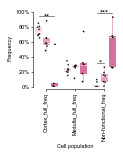

In [29]:
from plotting.utils import plot_grouped_boxplot, calc_figsize, get_tint_palette, thyAgeing_colors
# Formatting
from matplotlib import font_manager
font_manager.fontManager.addfont("/nfs/team205/ny1/ThymusSpatialAtlas/software/Arial.ttf")
plt.style.use('/nfs/team205/lm25/thymus_projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

plot_grouped_boxplot(data = df, x = 'compartment', y = 'mean_prop', hue = 'age_group', order = comps1, hue_order = ['paed_early', 'paed_late', 'adult'], 
                     x_label = 'Cell population', y_label = 'Frequency', legend_title = 'Age group', add_stats = True, format_percent = True, figsize = calc_figsize(height = 50, width = 40),
                     save_stats = f'{data_path}/thyAgeing_all_compartment_pixel_freq',
                     palette = get_tint_palette(thyAgeing_colors['magenta']),annotator_args = dict(line_offset = 20, text_offset = -2, line_offset_to_group = 10),
                     )
plt.savefig(f'{plot_path}/thyAgeing_all_compartment_pixel_freq_boxplot.pdf')

## Fit the splines for compartments percentage vs age 

In [14]:
spatial_anno2donor_plot = spatial_anno2donor.melt(id_vars=['age_years','donor'], value_vars=comps1)

spatial_anno2donor_plot.to_csv(f'{data_path}/ThyAge_spatial_anno2donor_v2_annotations.csv', index=False)

In [16]:
plt.style.use('/nfs/team205/vk8/projects/thymus_ageing_atlas/General_analysis/scripts/plotting/thyAgeing.mplstyle')

/tmp/ipykernel_3874152/2749452298.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(100*tick) for tick in plt.gca().get_yticks()])


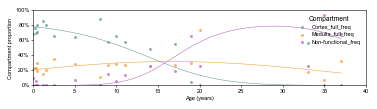

Saved plot to: /nfs/team205/vk8/projects/thymus_ageing_atlas/Spatial_analyses/plots/Spatial_comp2donor_tech_quadratic_logit_splines_v4.pdf


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrix
from scipy.special import expit, logit
import statsmodels.api as sm
#from plotting.utils import calc_figsize

# --- settings you can tweak ---
df_spline = 3          # flexibility of the spline (higher = more wiggle)
df_degree = 2
marker_size = 7       # scatter marker size
#line_width = 2
outfile2 = f"{plot_path}/Spatial_comp2donor_tech_quadratic_logit_splines_v4.pdf"
eps = 1e-5             # to avoid logit(0) / logit(1)

# a pool of distinct markers to cycle through
markers = ['o', 's', '^', 'D', 'P', 'X', 'v', '<', '>', 'h', 'H', '*', 'p']

# --- 0) Standardize age globally so all compartments use the same basis ---
age_mean = spatial_anno2donor_plot['age_years'].mean()
age_std  = spatial_anno2donor_plot['age_years'].std()
if age_std == 0 or np.isnan(age_std):
    age_std = 1.0  # fallback to avoid division by zero
  
plt.figure(figsize=(4.72441,1.37795))
for i, compartment in enumerate(spatial_anno2donor_plot['variable'].unique()):
    subset = spatial_anno2donor_plot[spatial_anno2donor_plot['variable'] == compartment].copy()

    x = subset['age_years'].to_numpy()
    y = subset['value'].to_numpy()

    # 1) keep y strictly inside (0,1) for the logit
    y_clip = np.clip(y, eps, 1 - eps)
    z = logit(y_clip)  # log-odds

    # 2) quadratic B-spline basis with an intercept
    X = dmatrix(f"bs(age_years, df={df_spline}, degree={df_degree}, include_intercept=True)",
                data=subset, return_type='dataframe')

    # 3) fit least squares on the logit scale
    fit = sm.OLS(z, X).fit()

    # 4) smooth grid for plotting
    xg = np.linspace(x.min(), x.max(), 300)
    Xg = dmatrix(f"bs(age_years, df={df_spline}, degree={df_degree}, include_intercept=True)",
                 {"age_years": xg}, return_type='dataframe')

    # 5) predict on logit scale, map back with expit -> [0,1]
    zhat = fit.predict(Xg)
    yhat = expit(zhat)

    # 6) plot points and curve with distinct markers
    # Define colors for compartments
    colors = ['#ba6ec3', '#f4a03d', '#6e9e9b'][::-1]
    color = colors[i % len(colors)]

    plt.scatter(x, y, alpha=0.8, s=marker_size,
                marker='o',
                color=color,
                linewidth=0, 
                label=compartment)
    plt.plot(xg, yhat, color=color)

plt.xlabel('Age (years)')
plt.ylabel('Compartment proportion')
plt.gca().set_ylim(0, 1)
plt.gca().set_yticklabels(['{:.0f}%'.format(100*tick) for tick in plt.gca().get_yticks()])
plt.legend(title='Compartment', frameon=False)
plt.tight_layout()
plt.savefig(outfile2)
plt.show()

print(f"Saved plot to: {outfile2}")
